In [50]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_df = pd.merge(clinical_df, mouse_df, on = 'Mouse ID')

#rename tumor column
drug_df = drug_df.rename(columns={'Tumor Volume (mm3)': 'Volume'}) 

# Display the data table for preview
drug_df.head()

,Mouse ID,Timepoint,Volume,Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [51]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_volume = drug_df.groupby(['Drug', 'Timepoint'])['Volume'].mean()

# Convert to DataFrame
mean_volume_df = pd.DataFrame({'Average' : mean_volume})
mean_volume_df = mean_volume.reset_index()
# Preview DataFrame
mean_volume_df.head()

,Drug,Timepoint,Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [52]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
st_error = drug_df.groupby(['Drug', 'Timepoint'])['Volume'].sem()
# Convert to DataFrame
st_error_df = pd.DataFrame({'Standard Error' : st_error})
st_error_df = st_error.reset_index()
# Preview DataFrame
st_error_df.head()


,Drug,Timepoint,Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [53]:
# Minor Data Munging to Re-Format the Data Frames
reformat_volume_df = mean_volume_df.pivot(index='Timepoint', columns='Drug',values='Volume')
reformat_sem_df = st_error_df.pivot(index='Timepoint', columns='Drug',values='Volume')
# Preview that Reformatting worked
reformat_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


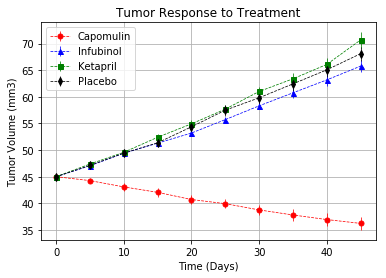

In [57]:
# Generate the Plot (with Error Bars)

plt.errorbar(reformat_volume_df.index, reformat_volume_df["Capomulin"], yerr=reformat_sem_df["Capomulin"], 
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)

plt.errorbar(reformat_volume_df.index, reformat_volume_df["Infubinol"], yerr=reformat_sem_df["Infubinol"], 
             color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)

plt.errorbar(reformat_volume_df.index, reformat_volume_df["Ketapril"], yerr=reformat_sem_df["Ketapril"], 
             color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)

plt.errorbar(reformat_volume_df.index, reformat_volume_df["Placebo"], yerr=reformat_sem_df["Placebo"], 
             color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)




plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.grid()


# Save the Figure
plt.savefig(os.path.join('treatment_response.png'))

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [58]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met= drug_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_met_df = mean_met.reset_index()
# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [59]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ste_met= drug_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
ste_met_df = ste_met.reset_index()
# Preview DataFrame
ste_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [60]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_df = mean_met_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')
reformat_met_sem_df = ste_met_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
reformat_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


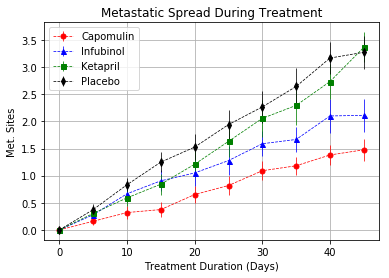

In [61]:
# Generate the Plot (with Error Bars)
plt.errorbar(reformat_mean_df.index, reformat_mean_df["Capomulin"], yerr=reformat_met_sem_df["Capomulin"], 
             color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)

plt.errorbar(reformat_mean_df.index, reformat_mean_df["Infubinol"], yerr=reformat_met_sem_df["Infubinol"], 
             color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)

plt.errorbar(reformat_mean_df.index, reformat_mean_df["Ketapril"], yerr=reformat_met_sem_df["Ketapril"], 
             color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)

plt.errorbar(reformat_mean_df.index, reformat_mean_df["Placebo"], yerr=reformat_met_sem_df["Placebo"], 
             color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(loc='best')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('met_response.png'))
# Show the Figure
plt.show()

## Survival Rates

In [62]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_df.groupby(['Drug','Timepoint'])['Mouse ID'].nunique()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df = mice_count.reset_index()
mice_count_df= mice_count_df.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [63]:
# Minor Data Munging to Re-Format the Data Frames
reformat_survival_df = mice_count_df.pivot(index='Timepoint', columns='Drug',values='Mouse Count')
# Preview the Data Frame
reformat_survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


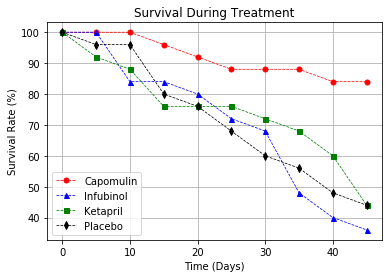

In [67]:
# Generate the Plot (Accounting for percentages)

c_plot = 100 * reformat_survival_df['Capomulin'] / 25
i_plot= 100 * reformat_survival_df['Infubinol'] / 25
k_plot = 100 * reformat_survival_df['Ketapril'] / 25
p_plot = 100 * reformat_survival_df['Placebo'] / 25

plt.plot(c_plot, color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.75)

plt.plot(i_plot, color="blue", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)

plt.plot(k_plot, color="green", marker="s", markersize=5, linestyle="dashed", linewidth=0.75)

plt.plot(p_plot, color="black", marker="d", markersize=5, linestyle="dashed", linewidth=0.75)



plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='best')
plt.grid()
# Save the Figure
plt.savefig(os.path.join('suvival.png'))
# Show the Figure
plt.show()

## Summary Bar Graph

In [69]:
# Calculate the percent changes for each drug
changes = (reformat_volume_df.iloc[-1]/(reformat_volume_df.iloc[0])-1)*100

# Display the data to confirm
changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

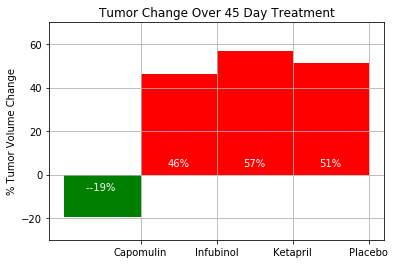

In [91]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (changes["Capomulin"], 
               changes["Infubinol"], 
               changes["Ketapril"], 
               changes["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))  
width = 1
passing = ax.bar(ind[0], percent_changes[0], width, color='green')
failing = ax.bar(ind[1:], percent_changes[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylim([-30,70])
ax.grid(True)


# Use functions to label the percentages of changes
def autolabelF(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelP(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelP(passing)
autolabelF(failing)

# Save the Figure
plt.savefig(os.path.join('tumor_change.png'))

# Show the Figure
fig.show()